<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# **Retail Sales Dataset 2018-2022**

## **Lab 2. Data Wrangling**

Estimated time needed: **30** minutes

### **Dataset Attributes**
*   Date: year and month
*   SKU: unique code consisting of letters and numbers that identify each product
*   Group: group of related products which share some common attributes
*   Units Pkg: package weight (kg)
*   Avg Price Pkg: average price per package
*   Sales Pkg: total package sales per month

### **Target Field**
*   Turnover per month

## **Objectives**

After completing this lab you will be able to:

*   Detect and handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


## **What is the purpose of data wrangling?**
If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:

### **Import Data**
<p>
You can find the "Retail Sales Dataset 2018-2022" from the following link: <a href="https://www.kaggle.com/datasets/tsmldata/retail-sales-dataset-2018-2022">https://www.kaggle.com/datasets/tsmldata/retail-sales-dataset-2018-2022</a>. 
We will be using this dataset throughout this course.
</p>


#### **Import pandas**
If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [1]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

pd.set_option('display.precision', 2)

## **Reading the dataset from the URL**


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [3]:
filename = "sales_1.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [4]:
df = pd.read_csv(filename)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [5]:
# To see what the data set looks like, we'll use the head() method.
df.head(5)

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg
0,201801,SKU_01,A,13,5,879
1,201801,SKU_02,B,7,7,8
2,201801,SKU_03,B,7,6,197
3,201801,SKU_04,C,4,6,1
4,201801,SKU_05,C,6,8,1


Let's check if there are any uncorrect values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138 entries, 0 to 4137
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           4138 non-null   int64 
 1   SKU            4138 non-null   object
 2   Group          4138 non-null   object
 3   Units Pkg      4138 non-null   int64 
 4   Avg Price Pkg  4138 non-null   int64 
 5   Sales Pkg      4138 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 194.1+ KB


As we can see above, there are no uncorrect values.

<h2 id="identify_missing_values"><b>Identify missing values</b></h2>

#### **Evaluating for Missing Data**

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [7]:
missing_data = df.isnull()
missing_data.head(5)

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4><b>Count missing values in each column</b></h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method <code>value_counts()</code> counts the number of "True" values. 
</p>


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Date
False    4138
Name: Date, dtype: int64

SKU
False    4138
Name: SKU, dtype: int64

Group
False    4138
Name: Group, dtype: int64

Units Pkg
False    4138
Name: Units Pkg, dtype: int64

Avg Price Pkg
False    4138
Name: Avg Price Pkg, dtype: int64

Sales Pkg
False    4138
Name: Sales Pkg, dtype: int64



Based on the summary above, each column has 4138 rows of data and there are no columns that contain missing data.

<h3 id="correct_data_format"><b>Correct data format</b></h3>
<p>This step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>

In [9]:
df.dtypes

Date              int64
SKU              object
Group            object
Units Pkg         int64
Avg Price Pkg     int64
Sales Pkg         int64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Group and SKU are categorical variables, so instead of "object" these have to be "category" type. Column "Date" has type "int64", but it's better to convert it to "datetime". We have to convert data types into a proper format for uncorrect column using the <code>astype()</code> method.</p> 


* **Convert data type of "Date" column**</br>
We need to transform data type in "Date" column from <code>int64</code> to <code>datetime</code>. We have information only about year and month, so day doesn't matter.

In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y%m")

Great, now "Date" column has correct look.

* **Convert data type of "Group" and "SKU" column**</br>
Next, we want to transform our "Group" and "SKU" data type from object to category. We'll use <code>.astype()</code> method.

In [11]:
df["Group"].unique()

array(['A', 'B', 'C', 'D', 'F', 'H', 'I', 'G', 'J', 'K', 'L', 'M', 'N',
       'Q', 'O', 'R', 'S', 'P', 'T', 'U', 'X', 'V', 'W', 'Y', 'Z'],
      dtype=object)

In [12]:
df["Group"].nunique()

25

In [13]:
df["SKU"].unique()

array(['SKU_01', 'SKU_02', 'SKU_03', 'SKU_04', 'SKU_05', 'SKU_06',
       'SKU_07', 'SKU_08', 'SKU_09', 'SKU_10', 'SKU_11', 'SKU_12',
       'SKU_13', 'SKU_14', 'SKU_15', 'SKU_16', 'SKU_17', 'SKU_18',
       'SKU_19', 'SKU_20', 'SKU_21', 'SKU_22', 'SKU_23', 'SKU_24',
       'SKU_25', 'SKU_26', 'SKU_27', 'SKU_28', 'SKU_29', 'SKU_30',
       'SKU_31', 'SKU_32', 'SKU_33', 'SKU_34', 'SKU_35', 'SKU_36',
       'SKU_37', 'SKU_38', 'SKU_39', 'SKU_40', 'SKU_41', 'SKU_42',
       'SKU_43', 'SKU_44', 'SKU_45', 'SKU_46', 'SKU_47', 'SKU_48',
       'SKU_49', 'SKU_50', 'SKU_51', 'SKU_52', 'SKU_53', 'SKU_54',
       'SKU_55', 'SKU_56', 'SKU_57', 'SKU_58', 'SKU_59', 'SKU_60',
       'SKU_61', 'SKU_62', 'SKU_63', 'SKU_64', 'SKU_65', 'SKU_66',
       'SKU_67', 'SKU_68', 'SKU_69', 'SKU_70', 'SKU_71', 'SKU_72',
       'SKU_73', 'SKU_74', 'SKU_75', 'SKU_76', 'SKU_77', 'SKU_78',
       'SKU_79', 'SKU_80', 'SKU_81', 'SKU_82', 'SKU_83', 'SKU_84',
       'SKU_85', 'SKU_86', 'SKU_87', 'SKU_88', 'SKU_89', 'SKU_

In [14]:
df["SKU"].nunique()

188

As we can see, there are 25 values of "Group" and 188 values of "SKU", so it'll be good idea to turn their data type to categorical.

In [15]:
df[["Group"]] = df[["Group"]].astype("category")
df[["SKU"]] = df[["SKU"]].astype("category")

In [16]:
df.dtypes

Date             datetime64[ns]
SKU                    category
Group                  category
Units Pkg                 int64
Avg Price Pkg             int64
Sales Pkg                 int64
dtype: object

In [17]:
df.head()

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg
0,2018-01-01,SKU_01,A,13,5,879
1,2018-01-01,SKU_02,B,7,7,8
2,2018-01-01,SKU_03,B,7,6,197
3,2018-01-01,SKU_04,C,4,6,1
4,2018-01-01,SKU_05,C,6,8,1


<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


## **Adding new column, grouping and sorting data**

* **Adding new column**</br>
For our future calculations it will be convenient to have a new column that shows us turnover per month.</br> The formula is: **Turnover per month = Average price per package * Total package sales per month**

In [18]:
df["Turnover per month"] = df["Avg Price Pkg"] * df["Sales Pkg"]
df.head(5)

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg,Turnover per month
0,2018-01-01,SKU_01,A,13,5,879,4395
1,2018-01-01,SKU_02,B,7,7,8,56
2,2018-01-01,SKU_03,B,7,6,197,1182
3,2018-01-01,SKU_04,C,4,6,1,6
4,2018-01-01,SKU_05,C,6,8,1,8


* **Grouping data**</br>
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</br>
The reason for grouping data is to see, for example, total turnover by year or average turnover by month etc.

1. Let's group our turnover values by year and month:

We group data by year and month columns, and then we show summary value of grouped turnover. 

In [19]:
result1 = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Turnover per month'].sum()
result1

Date  Date
2018  1       139199
      2       126220
      3       127198
      4       136222
      5       132770
      6       146458
      7       144162
      8       133359
      9       160207
      10      143431
      11      147089
      12      124796
2019  1       148652
      2       141280
      3       155324
      4       177891
      5       162456
      6       157328
      7       183620
      8       171221
      9       169857
      10      177715
      11      163791
      12      106728
2020  1       230779
      2       183065
      3       217457
      4       179680
      5       180983
      6       197628
      7       211966
      8       244625
      9       185770
      10      212419
      11      207530
      12      145190
2021  1       257784
      2       224572
      3       281821
      4       186257
      5       248401
      6       273942
      7       282488
      8       230043
      9       228664
      10      250806
      11      253556
  

Let's make this table looks more convenient to see. For this we'll use <code>pivot_table()</code> method.

In [23]:
pivot1 = pd.pivot_table(df, values="Turnover per month", index=df['Date'].dt.month, columns=df['Date'].dt.year, aggfunc="sum")
pivot1.index.names = ["Month"]
pivot1.columns.names = ["Turnover"]
pivot1

Turnover,2018,2019,2020,2021,2022
Month,,,,,
1,139199,148652,230779,257784,281565
2,126220,141280,183065,224572,243755
3,127198,155324,217457,281821,306836
4,136222,177891,179680,186257,230128
5,132770,162456,180983,248401,270722
6,146458,157328,197628,273942,298270
7,144162,183620,211966,282488,295284
8,133359,171221,244625,230043,312516
9,160207,169857,185770,228664,343136


Let's use a heat map to visualize the relationship between Turnover vs Date.


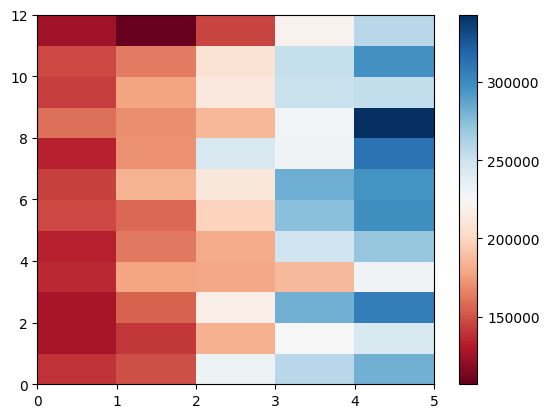

In [21]:
%matplotlib inline
plt.pcolor(pivot1, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (turnover) proportional to colour with respect to the Month and Year on the vertical and horizontal axis, respectively. This allows us to visualize how the turnover is related to Month and Year.</br>
For example, we can see that in December 2019 (2019-12) there was low turnover (dark red color), and we can check it using our <code>pivot1</code> table.

But the default labels convey no useful information to us. Let's change that:

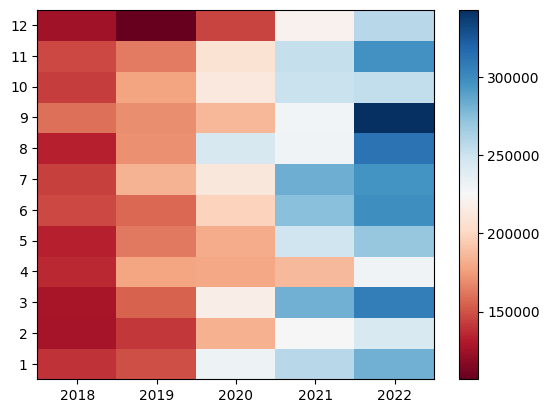

In [22]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot1, cmap='RdBu')

# label names
row_names = pivot1.columns
col_names = pivot1.index

# move ticks and labels to the center
ax.set_xticks(np.arange(pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot1.shape[0]) + 0.5, minor=False)

# set names
ax.set_xticklabels(row_names, minor=False)
ax.set_yticklabels(col_names, minor=False)

fig.colorbar(im)
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.

2. Let's group our turnover values by year and name of group:

In [23]:
result2 = df.groupby([df["Date"].dt.year, "Group"])
result2["Turnover per month"].sum()

Date  Group
2018  A         51706
      B         46490
      C         11560
      D        748378
      F        145409
                ...  
2022  V        328990
      W        341970
      X          1430
      Y         15810
      Z             0
Name: Turnover per month, Length: 125, dtype: int64

Using <code>pivot_table</code>:

In [24]:
pivot2 = pd.pivot_table(df, values="Turnover per month", index="Group", columns=df['Date'].dt.year, aggfunc="sum")
pivot2.index.names = ["Group of related products"]
pivot2.columns.names = ["Turnover per year"]
pivot2

Turnover per year,2018,2019,2020,2021,2022
Group of related products,,,,,
A,51706,59934,65328,66318,61602
B,46490,162256,197813,220173,239552
C,11560,6376,3961,222,1263
D,748378,705342,709744,761647,727136
F,145409,174244,215381,243793,27636
G,23180,26463,1811,0,0
H,9408,11656,11608,16264,24992
I,54221,60317,69871,100457,132915
J,331298,315280,327052,259842,0


3. Let's group our total package sales per month values (Sales Pkg) by year and name of group:

In [25]:
result3 = df.groupby([df["Date"].dt.year, "Group"])
result3["Sales Pkg"].sum()

Date  Group
2018  A        10205
      B         7461
      C         1456
      D        92388
      F        11878
               ...  
2022  V        24170
      W        27121
      X           55
      Y         1611
      Z            0
Name: Sales Pkg, Length: 125, dtype: int64

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
  <b style="font-size: 2em; font-weight: bold;">Question #1:</b>

<b>Group total package sales per month values (Sales Pkg) by year and name of group using <code>pivot_table</code> function</b>

</div>


In [26]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
pivot3 = pd.pivot_table(df, values="Sales Pkg", index="Group", columns=df["Date"].dt.year, aggfunc="sum")
pivot3.index.names = ["Group of related products"]
pivot3.columns.names = ["Total package sales per year"]
pivot3


```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
  <b style="font-size: 2em; font-weight: bold;">Question #2:</b>
    
<b>Group average turnover values by year and SKU using <code>groupby()</code> function</b>

</div>


In [27]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
result4 = df.groupby([df["Date"].dt.year, "SKU"])
result4["Turnover per month"].mean()

```

</details>


* **Sorting data**</br>
   Firstly, we'll sort by groups (A, B, C...)</br>
   Secondly, by years (from 2022 to 2018)

In [28]:
df1 = df.sort_values(by=["Group", "Date"], ascending=[True, False])
df1.head()

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg,Turnover per month
4072,2022-12-01,SKU_103,A,13,6,257,1542
4073,2022-12-01,SKU_91,A,13,6,422,2532
3994,2022-11-01,SKU_103,A,13,6,307,1842
3995,2022-11-01,SKU_91,A,13,6,370,2220
3913,2022-10-01,SKU_103,A,13,6,249,1494


We typed <code>ascending=[True, False]</code> because we needed to sort "Group" column from A to Z (ascendingly) and "Date" column from 2022 to 2018 (descendingly).

<h2 id="data_standardization"><b>Data Standardization</b></h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

Let's focus on the "Date" column. We have changed data type of this column so far, but as you might see, there were also days of the month ("2018-01-01"). We don't have information about days, only months and years, so why it may seem quite confusing. So now let's remove the day value from the "Date" column.

**Attention!** </br>If you run this code, you'll get Date column in a proper way like "2018-01" but Date type will become string type, so you won't be able to use functions <code>.dt.month</code> for example. 

In [29]:
# df["Date"] = df["Date"].dt.strftime('%Y-%m')
# df.head()

<h2 id="data_normalization"><b>Data Normalization</b></h2>

<b>What's normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.<br>
The main goal of normalization is to bring all variables into the same range, so that no single variable dominates the analysis.
</p>

<b>Why normalization?</b>

Imagine a huge spread of data, for instance, price may vary from very little to very high and if we want to compare them, it would be difficult to do, especially when you'll want to visualize them. So normalizing the data can help bring them to a common scale, making it easier to compare and analyze the data.

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "Units Pkg", "Avg Price Pkg", "Sales Pkg" and "Turnover per month".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [30]:
# replace (original value) by (original value)/(maximum value) in copy df
df1 = df.copy()
df1['Units Pkg Normalized'] = df['Units Pkg'] / df['Units Pkg'].max()
df1['Avg Price Pkg Normalized'] = df['Avg Price Pkg'] / df['Avg Price Pkg'].max()

df1[["Units Pkg Normalized", "Avg Price Pkg Normalized"]].head()

,Units Pkg Normalized,Avg Price Pkg Normalized
0,0.13,0.19
1,0.07,0.27
2,0.07,0.23
3,0.04,0.23
4,0.06,0.31


In [31]:
df.head()

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg,Turnover per month
0,2018-01-01,SKU_01,A,13,5,879,4395
1,2018-01-01,SKU_02,B,7,7,8,56
2,2018-01-01,SKU_03,B,7,6,197,1182
3,2018-01-01,SKU_04,C,4,6,1,6
4,2018-01-01,SKU_05,C,6,8,1,8


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
  <b style="font-size: 2em; font-weight: bold;">Question #3:</b>

<b>According to the example above, normalize the columns "Sales Pkg" and "Turnover per month".</b>

</div>


In [32]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df1['Sales Pkg Normalized'] = df['Sales Pkg'] / df['Sales Pkg'].max()
df1['Turnover per month Normalized'] = df['Turnover per month'] / df['Turnover per month'].max() 

# show the scaled columns
df1[["Sales Pkg Normalized", "Turnover per month Normalized"]].head()


```

</details>


Here we can see we've normalized "Units Pkg", "Avg Price Pkg", "Sales Pkg" and "Turnover per month" in the range of \[0,1].


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
  <b style="font-size: 2em; font-weight: bold;">Question #4:</b>

<b>Can you normalize the same columns using built-in function?</b>

</div>


In [33]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for hint</summary>
    Another way to do it is to use <code>sklearn.preprocessing.normalize</code> function from scikit-learn library.
</details>

<details><summary>Click here for the solution</summary>

```python
from sklearn.preprocessing import normalize

df1["Units Pkg Normalized"] = normalize(df["Units Pkg"].values.reshape(-1, 1), norm="max", axis=0, copy=False)
df1["Avg Price Pkg Normalized"] = normalize(df["Avg Price Pkg"].values.reshape(-1, 1), norm="max", axis=0, copy=False)

df1.head()

```

</details>

<details><summary>Click here for explanation</summary>
norm field means way to normalize, for example, norm='l2' corresponds to the Euclidean normalization, while norm="max" corresponds for maximum normalization, like we implemented before. axis=0 corresponds to column-wise normalization. If axis=1, row-wise normalization is performed. 
</details>

<h2 id="binning"><b>Binning</b></h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Avg Price Pkg" is a real valued variable ranging from 2 to 26 and it has 19 unique values. (we can check this using <code>df["Avg Price Pkg"].unique()</code> What if we only care about high average price, medium average price and low average price? (3 types) Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'Avg Price Pkg' column into 3 bins.</p>


### **Example of Binning Data In Pandas**


Let's plot the histogram of turnover to see what the distribution of turnover per month looks like.


Text(0.5, 1.0, 'Average Price bins')

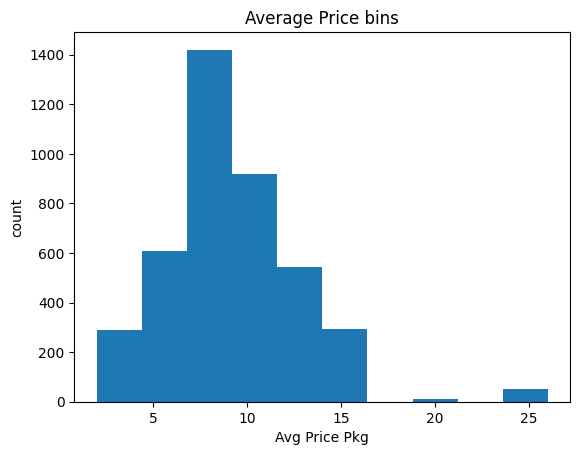

In [34]:
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["Avg Price Pkg"])

# set x/y labels and plot title
plt.pyplot.xlabel("Avg Price Pkg")
plt.pyplot.ylabel("count")
plt.pyplot.title("Average Price bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of turnover per month, we want to set <code>start_value = min(df["Turnover per month"])</code>.</p>
<p>Since we want to include the maximum value of turnover per month, we want to set <code>end_value = max(df["Turnover per month"])</code>.</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [35]:
bins = np.linspace(min(df["Avg Price Pkg"]), max(df["Avg Price Pkg"]), 4)
bins

array([ 2., 10., 18., 26.])

We set group  names:


In [36]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['Turnover per month']` belongs to.


In [37]:
df['Avg Price Pkg binned'] = pd.cut(df['Avg Price Pkg'], bins, labels=group_names, include_lowest=True )
df[['Avg Price Pkg','Avg Price Pkg binned']].head(15)

,Avg Price Pkg,Avg Price Pkg binned
0,5,Low
1,7,Low
2,6,Low
3,6,Low
4,8,Low
5,8,Low
6,9,Low
7,8,Low
8,7,Low
9,7,Low


Let's see the number of vehicles in each bin:


In [38]:
df["Avg Price Pkg binned"].value_counts()

Low       2822
Medium    1251
High        65
Name: Avg Price Pkg binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'Average price bins')

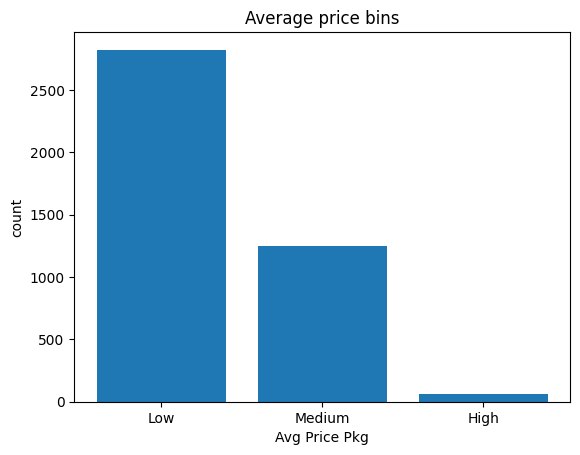

In [39]:
pyplot.bar(group_names, df["Avg Price Pkg binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Avg Price Pkg")
plt.pyplot.ylabel("count")
plt.pyplot.title("Average price bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for average price based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 19 to 3!
</p>


### **Bins Visualization**
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'Average price bins')

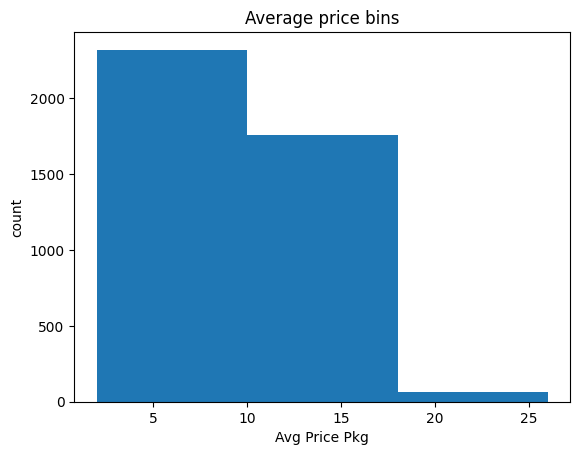

In [40]:
# draw historgram of attribute "Turnover per month" with bins = 3
plt.pyplot.hist(df["Avg Price Pkg"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Avg Price Pkg")
plt.pyplot.ylabel("count")
plt.pyplot.title("Average price bins")

The plot above shows the binning result for the attribute "Avg Price Pkg".


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
  <b style="font-size: 2em; font-weight: bold;">Question #5:</b>

<b>Bin column "Sales Pkg" and visualize it.</b>

</div>


In [52]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# to see distribution of total package sales
plt.pyplot.hist(df["Sales Pkg"])
plt.pyplot.xlabel("Sales Pkg")
plt.pyplot.ylabel("count")
plt.pyplot.title("Total package sales")

# divide to 3 bins
bins_sales = np.linspace(min(df["Sales Pkg"]), max(df["Sales Pkg"]), 4)
bins_sales

# give a name
df["Sales Pkg binned"] = pd.cut(df["Sales Pkg"], bins_sales, labels=group_names, include_lowest=True)
df[["Sales Pkg binned", "Sales Pkg"]].head()

# visualize binned
plt.pyplot.bar(group_names, df["Sales Pkg binned"].value_counts())
plt.pyplot.xlabel("Sales Pkg bins")
plt.pyplot.ylabel("count")
plt.pyplot.title("Total package sales")
```

</details>


<h2 id="indicator"><b>Indicator Variable (or Dummy Variable)</b></h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "Avg Price Pkg binned" has 3 unique values. Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Avg Price Pkg binned" to indicator variables.
</p>

<p>
    We will use pandas' method <code>get_dummies</code> to assign numerical values to different categories of "Avg Price Pkg binned". 
</p>


In [42]:
df["Avg Price Pkg binned"].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [43]:
df["Avg Price Pkg binned"].nunique()

3

In [44]:
df.head()

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg,Turnover per month,Avg Price Pkg binned,Sales Pkg binned
0,2018-01-01,SKU_01,A,13,5,879,4395,Low,Low
1,2018-01-01,SKU_02,B,7,7,8,56,Low,Low
2,2018-01-01,SKU_03,B,7,6,197,1182,Low,Low
3,2018-01-01,SKU_04,C,4,6,1,6,Low,Low
4,2018-01-01,SKU_05,C,6,8,1,8,Low,Low


Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [45]:
dummy_variable = pd.get_dummies(df["Avg Price Pkg binned"])
dummy_variable.head()

,Low,Medium,High
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


We can get data at certain indexes:

In [46]:
dummy_variable.loc[765:]

,Low,Medium,High
765,1,0,0
766,1,0,0
767,1,0,0
768,1,0,0
769,1,0,0
...,...,...,...
4133,1,0,0
4134,1,0,0
4135,0,1,0
4136,1,0,0


Or we can get, for instance, data about high turnover:

In [47]:
dummy_variable[dummy_variable["High"] == 1]

,Low,Medium,High
3023,0,0,1
3024,0,0,1
3025,0,0,1
3095,0,0,1
3096,0,0,1
...,...,...,...
4116,0,0,1
4117,0,0,1
4118,0,0,1
4128,0,0,1


Change the column names for clarity:


In [48]:
dummy_variable.rename(columns={'Low':'Low avg price', 'Medium':'Medium avg price', "High" : "High avg price"}, inplace=True)
dummy_variable.head()

,Low avg price,Medium avg price,High avg price
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [49]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable], axis=1)

# drop original column "Turnover per month binned" from "df"
# df.drop("Turnover per month binned", axis=1, inplace=True)

Note: you can delete "Turnover per month binned", but if you want to rerun code of distribution of each bin you must restart kernel.

In [50]:
df.head()

,Date,SKU,Group,Units Pkg,Avg Price Pkg,Sales Pkg,Turnover per month,Avg Price Pkg binned,Sales Pkg binned,Low avg price,Medium avg price,High avg price
0,2018-01-01,SKU_01,A,13,5,879,4395,Low,Low,1,0,0
1,2018-01-01,SKU_02,B,7,7,8,56,Low,Low,1,0,0
2,2018-01-01,SKU_03,B,7,6,197,1182,Low,Low,1,0,0
3,2018-01-01,SKU_04,C,4,6,1,6,Low,Low,1,0,0
4,2018-01-01,SKU_05,C,6,8,1,8,Low,Low,1,0,0


The last three columns are now the indicator variable representation of the "Avg Price Pkg binned" variable. They're all 0s and 1s now.


**Save the new csv**

In [51]:
df.to_csv('clean_sales_1.csv', index=False)

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">EDIT WHEN PUBLISH LAB 2!!!!!!!!!!!!!!!!</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### **Thank you for completing this lab!**

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
